#1
Consider multiplying matrix A (n x k) with matrix B (k x m):
A (n x k) * B (k x m) = C (n x m)

To calculate each element of the resulting matrix C


    We multiply corresponding elements from a row of A and a column of B
    We then sum these products
    


In [ ]:
For each element c_ij in C:
c_ij = sum(a_ik * b_kj) for k = 1 to k

In [ ]:
Operations per element:

k multiplications
k-1 additions (we add k terms, which requires k-1 addition operations)




In [ ]:
Total elements in C: n * m

Therefore, the total operations are:

Multiplications: n * m * k
Additions: n * m * (k-1)

In [2]:
%pip install numpy
%pip install jax
%pip install sympy
%pip install math
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --u

In [3]:
#2 Using list of lists

import numpy as np
import time

def matrix_multiply(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k_idx in range(k):
                C[i][j] += A[i][k_idx] * B[k_idx][j]
    
    return C

# Generate random matrices
n, k, m = 3, 3, 3
A = [[np.random.randint(1, 10) for _ in range(k)] for _ in range(n)]
B = [[np.random.randint(1, 10) for _ in range(m)] for _ in range(k)]

C = matrix_multiply(A, B)
print("Matrix A:")
for row in A:
    print(row)

print("\nMatrix B:")
for row in B:
    print(row)

print("\nResulting Matrix C:")
for row in C:
    print(row)


Matrix A:
[1, 7, 1]
[2, 8, 6]
[9, 2, 6]

Matrix B:
[7, 8, 4]
[1, 8, 7]
[1, 8, 7]

Resulting Matrix C:
[15, 72, 60]
[28, 128, 106]
[71, 136, 92]


In [9]:
#2 using numpy

A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

print("\nResulting Matrix C:")
for row in C_np:
    print(row)

# List of lists approach
start_time = time.time()
C_list = matrix_multiply(A, B)
list_time = time.time() - start_time

# NumPy approach
A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

print(f"List of lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {list_time / numpy_time:.2f} times faster")



Resulting Matrix C:
[15 72 60]
[ 28 128 106]
[ 71 136  92]
List of lists time: 0.000074 seconds
NumPy time: 0.000033 seconds
NumPy is 2.23 times faster


The NumPy method is significantly faster.Some Reasonse can be:

Optimized Implementation: NumPy's matrix operations are implemented in C, which is much faster than Python's interpreted code.

Memory Efficiency: NumPy uses contiguous memory blocks for arrays, which is more cache-friendly and leads to faster memory access.

In [9]:
#3
To find the highest element in an unsorted list, we need to perform a single pass through the array, comparing each element to keep track of the maximum value , This operation has a time complexity of O(n), where n is the number of elements in the list.

Time complexity of finding the median using multiple passes:

To find the median using the method of multiple passes, we would need to find the (n/2)th highest element in an array of n elements, This would require n/2 passes through the array.
In each pass, we are scanning through the entire array, which is an O(n) operation
So, the total time complexity would be O(n * n/2) = O(n^2/2) = O(n^2)

In Case of Finding Median of Array,if the array is not sorted, finding the median requires sorting the array, which has a time complexity of O(n log n) in the worst case (using a comparison-based sorting algorithm like quicksort or mergesort).

If the array is already sorted, finding the median is simply a matter of returning the middle element (or the average of the two middle elements if the length of the array is even). This has a time complexity of O(1) since we just need to access a single element (or two elements) in the array.

SyntaxError: invalid syntax (3358554663.py, line 2)

In [3]:
#Better Approach: Quickselect (Average TC: O(n)) 

import numpy as np
import time
import random

def find_kth_largest(arr, k):
    for i in range(k):
        max_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] > arr[max_idx]:
                max_idx = j
        arr[i], arr[max_idx] = arr[max_idx], arr[i]
    return arr[k - 1]

def multiple_pass_median(arr):
    n = len(arr)
    if n % 2 == 0:
        return (find_kth_largest(arr.copy(), n // 2) + find_kth_largest(arr.copy(), n // 2 + 1)) / 2
    else:
        return find_kth_largest(arr.copy(), n // 2 + 1)

def partition(arr, left, right, pivot_idx):
    pivot = arr[pivot_idx]
    arr[pivot_idx], arr[right] = arr[right], arr[pivot_idx]
    store_idx = left
    for i in range(left, right):
        if arr[i] < pivot:
            arr[store_idx], arr[i] = arr[i], arr[store_idx]
            store_idx += 1
    arr[right], arr[store_idx] = arr[store_idx], arr[right]
    return store_idx

def quick_select(arr, left, right, k):
    if left == right:
        return arr[left]
    pivot_idx = random.randint(left, right)
    pivot_idx = partition(arr, left, right, pivot_idx)
    if k == pivot_idx:
        return arr[k]
    elif k < pivot_idx:
        return quick_select(arr, left, pivot_idx - 1, k)
    else:
        return quick_select(arr, pivot_idx + 1, right, k)

def quickselect_median(arr):
    n = len(arr)
    if n % 2 == 0:
        return (quick_select(arr, 0, n - 1, n // 2 - 1) + quick_select(arr.copy(), 0, n - 1, n // 2)) / 2
    else:
        return quick_select(arr, 0, n - 1, n // 2)


arr = np.random.randint(50, size=200)

# Multiple pass method
start_time = time.time()
result_multiple_pass = multiple_pass_median(arr)
multiple_pass_time = time.time() - start_time

# QuickSelect method
start_time = time.time()
result_quickselect = quickselect_median(arr)
quickselect_time = time.time() - start_time

# NumPy method
start_time = time.time()
result_numpy = np.median(arr)
numpy_time = time.time() - start_time

print(f"Multiple Pass method time: {multiple_pass_time:.6f} seconds")
print(f"QuickSelect method time: {quickselect_time:.6f} seconds")
print(f"NumPy method time: {numpy_time:.6f} seconds")



Multiple Pass method time: 0.012109 seconds
QuickSelect method time: 0.002253 seconds
NumPy method time: 0.009515 seconds


#4

Gradient of function wrt x = 2xy+ y^3cos(x)

Gradient of function wrt y = x^2+ 3y^2sin(x)

In [4]:
#5
from jax import grad
import jax.numpy as jnp
import math

def f(x,y):
    return x*x*y+y**3*jnp.sin(x)
df_dx = grad(f,argnums=0)
df_dy = grad(f,argnums=1)

a=2*2*1+1**3*math.cos(2)
b=2*2+3*1*1*math.sin(2)

##using jax
c=df_dx(2.0,1.0)
d=df_dy(2.0,1.0)

print("Values using jax = ",c,d,"\nValues of calculated gradient= ",a,b)

Values using jax =  3.5838532 6.727892 
Values of calculated gradient=  3.5838531634528574 6.727892280477045


In [5]:
#6
from sympy import *
x = Symbol('x')
y = Symbol('y')
ans1=diff(x*x*y+y*y*y*sin(x),x)
ans2=diff(x*x*y+y*y*y*sin(x),y)
print("Gradient of function wrt x =",ans1,"\nGradient of function wrt y =",ans2)

Gradient of function wrt x = 2*x*y + y**3*cos(x) 
Gradient of function wrt y = x**2 + 3*y**2*sin(x)


In [6]:
#7

student_records = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            },
            2: {
                "Name": "O",
                "Marks": {
                    "Maths": 99,
                    "English": 90
                }
            
        },
        "Branch 2": {
           
        }
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}}

print(student_records)


{2022: {'Branch 1': {1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'O', 'Marks': {'Maths': 99, 'English': 90}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}}


In [7]:
#8

class database:
    class year:
        def __init__(self,year):
            self.year=year
        class branch:
            def __init__(self,branch):
                self.branch=branch
            class student:
                def __init__(self,rollno,name):
                    self.name=name
                    self.rollno=rollno
                class marks:
                        def __init__(self,subject,number):
                            self.subject=subject
                            self.number=number

Text(0.5, 1.0, 'y=exp(x)')

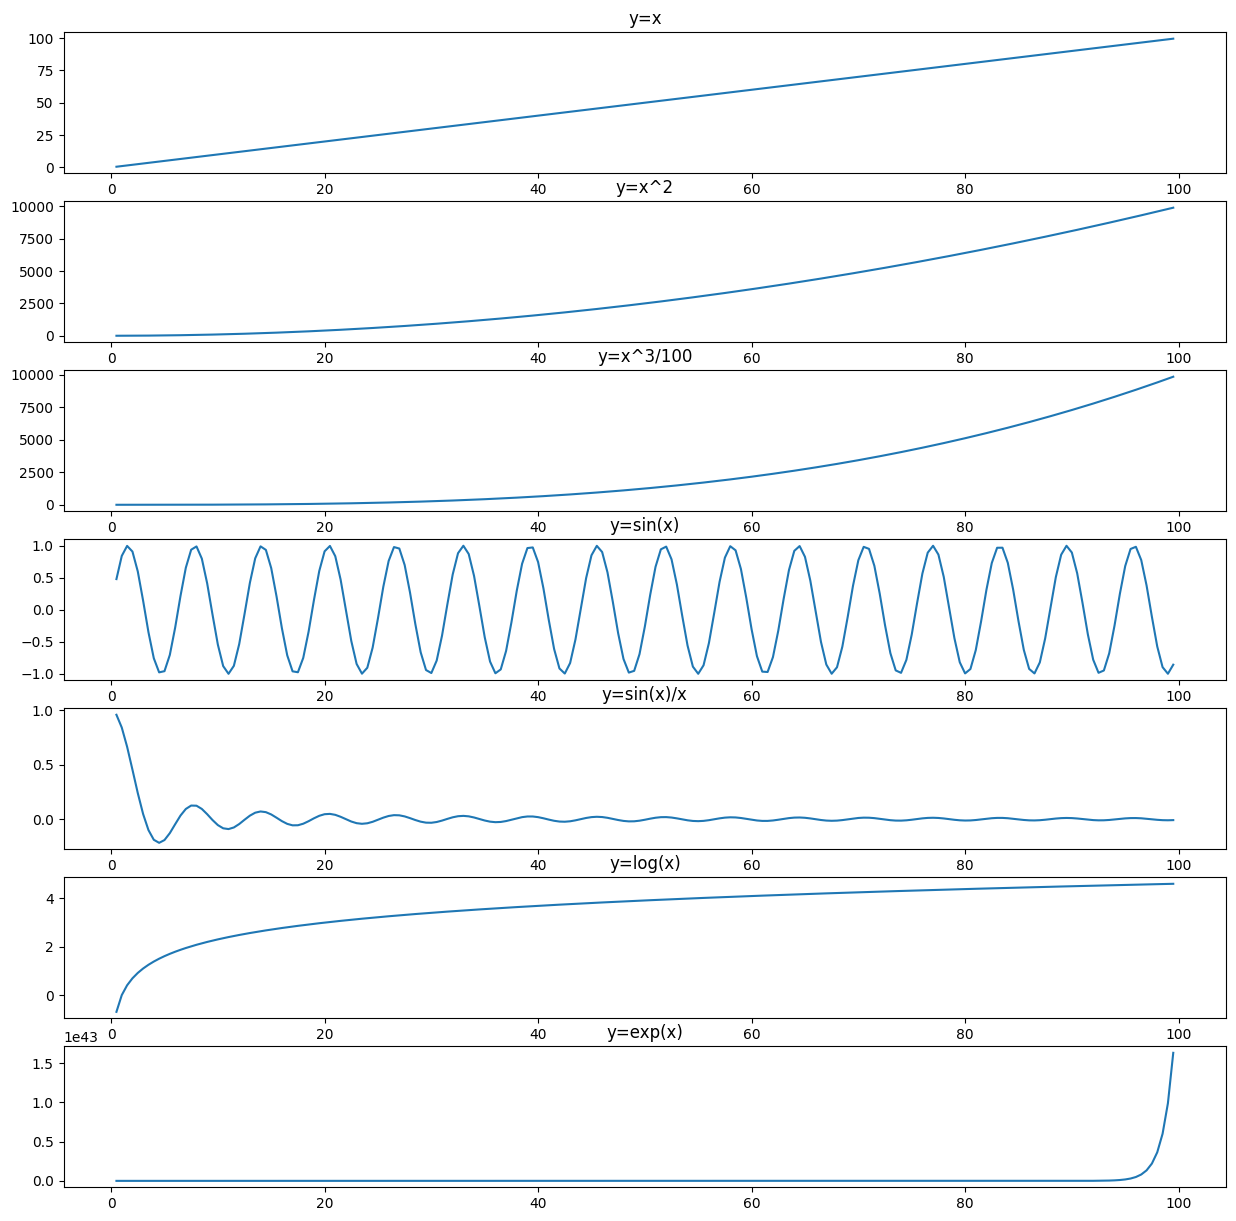

In [8]:
#9

import matplotlib.pyplot as plt

x= np.arange(0.5,100,0.5)
fig, axs = plt.subplots(7,figsize=(15,15))


y1=x
axs[0].plot(x,y1)
axs[0].set_title("y=x")

y2=x*x
axs[1].plot(x,y2)
axs[1].set_title("y=x^2")

y3=x**3/100
axs[2].plot(x,y3)
axs[2].set_title("y=x^3/100")

y4=np.sin(x)
axs[3].plot(x,y4)
axs[3].set_title("y=sin(x)")

y5=np.sin(x)/x
axs[4].plot(x,y5)
axs[4].set_title("y=sin(x)/x")

y6=np.log(x)
axs[5].plot(x,y6)
axs[5].set_title("y=log(x)")

y7=np.exp(x)
axs[6].plot(x,y7)
axs[6].set_title("y=exp(x)")

In [20]:
#10

import numpy as np


matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])


vector = np.array([10, 20, 30])

# Broadcasting example 1: Add the vector to each row of the matrix
result1 = matrix + vector

# Broadcasting example 2: Multiply the matrix by a scalar
scalar = 2
result2 = matrix * scalar

# Broadcasting example 3: Divide each column of the matrix by a vector
column_vector = np.array([[2], [3], [4]])
result3 = matrix / column_vector

print("Original matrix:")
print(matrix)

print("\nVector:")
print(vector)

print("\nResult 1 (matrix + vector):")
print(result1)

print("\nResult 2 (matrix * scalar):")
print(result2)

print("\nColumn vector:")
print(column_vector)

print("\nResult 3 (matrix / column_vector):")
print(result3)


Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector:
[10 20 30]

Result 1 (matrix + vector):
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Result 2 (matrix * scalar):
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]

Column vector:
[[2]
 [3]
 [4]]

Result 3 (matrix / column_vector):
[[0.5        1.         1.5       ]
 [1.33333333 1.66666667 2.        ]
 [1.75       2.         2.25      ]]
